In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [84]:
#import numpy as np
#import pandas as pd
#from matplotlib import pyplot as plt

from fastai.imports import *

In [11]:
path = "../data/"

In [87]:
train_path = path + "train-jpg/"

In [12]:
train = pd.read_csv(path + "train_v2.csv")

In [13]:
type(train)

pandas.core.frame.DataFrame

In [17]:
train

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [24]:
from functools import reduce

In [46]:
tags = list(reduce(lambda x, y: x | set(y.split()), train['tags'], set()))
tags

['agriculture',
 'blow_down',
 'water',
 'partly_cloudy',
 'habitation',
 'conventional_mine',
 'clear',
 'cloudy',
 'bare_ground',
 'road',
 'cultivation',
 'haze',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'slash_burn',
 'primary']

In [57]:
for tag in tags:
    train[tag] = train['tags'].apply(lambda x: tag in x.split())

In [58]:
train

,image_name,tags,agriculture,blow_down,water,partly_cloudy,habitation,conventional_mine,clear,cloudy,bare_ground,road,cultivation,haze,artisinal_mine,blooming,selective_logging,slash_burn,primary
0,train_0,haze primary,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,train_1,agriculture clear primary water,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,train_2,clear primary,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,train_3,clear primary,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,train_4,agriculture clear habitation primary road,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True
5,train_5,haze primary water,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
6,train_6,agriculture clear cultivation primary water,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True
7,train_7,haze primary,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
8,train_8,agriculture clear cultivation primary,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
9,train_9,agriculture clear cultivation primary road,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True


In [65]:
train2 = train.drop(labels='tags', axis=1)
train2

,image_name,agriculture,blow_down,water,partly_cloudy,habitation,conventional_mine,clear,cloudy,bare_ground,road,cultivation,haze,artisinal_mine,blooming,selective_logging,slash_burn,primary
0,train_0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,train_1,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,train_2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,train_3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,train_4,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True
5,train_5,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
6,train_6,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True
7,train_7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
8,train_8,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
9,train_9,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True


In [80]:
train2.iloc[:, 1:].sum()

agriculture          12315
blow_down               98
water                 7411
partly_cloudy         7261
habitation            3660
conventional_mine      100
clear                28431
cloudy                2089
bare_ground            862
road                  8071
cultivation           4477
haze                  2697
artisinal_mine         339
blooming               332
selective_logging      340
slash_burn             209
primary              37513
dtype: int64

In [115]:
def getImagesWith(label):
    return train2.loc[train2[label]==True, 'image_name']

In [124]:
def getRandomImageWith(label):
    imgs = getImagesWith(label)
    return plt.imread(f'{train_path}{np.random.choice(imgs)}.jpg')

In [122]:
agr_imgs = getImagesWith('agriculture')

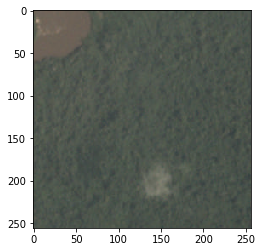

In [123]:
img = plt.imread(f'{train_path}{np.random.choice(agr_imgs)}.jpg')
plt.imshow(img);

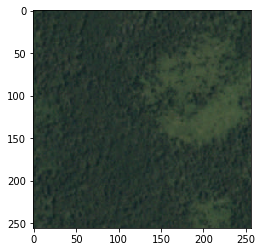

In [131]:
img = getRandomImagewith('blow_down')
plt.imshow(img);

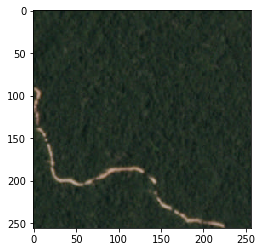

In [132]:
img = getRandomImagewith('water')
plt.imshow(img);

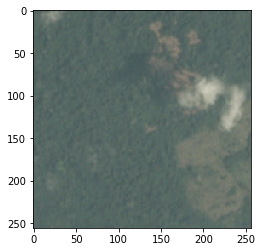

In [133]:
img = getRandomImagewith('partly_cloudy')
plt.imshow(img);

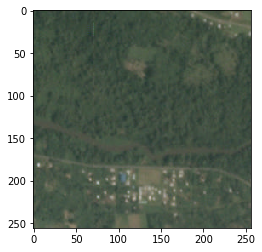

In [134]:
img = getRandomImagewith('habitation')
plt.imshow(img);

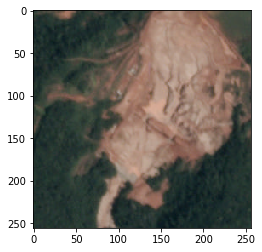

In [135]:
img = getRandomImagewith('conventional_mine')
plt.imshow(img);

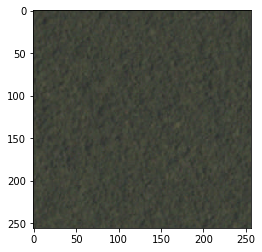

In [138]:
img = getRandomImagewith('clear')
plt.imshow(img);

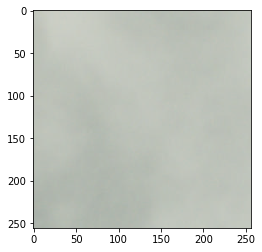

In [139]:
img = getRandomImagewith('cloudy')
plt.imshow(img);

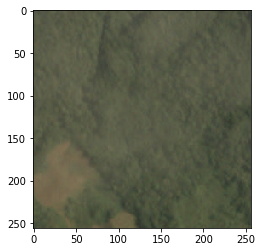

In [142]:
img = getRandomImagewith('bare_ground')
plt.imshow(img);

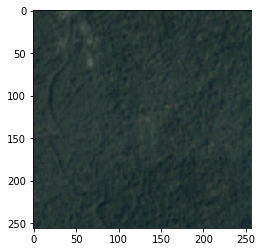

In [143]:
img = getRandomImagewith('road')
plt.imshow(img);

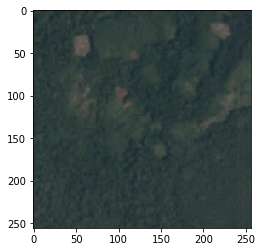

In [144]:
img = getRandomImagewith('cultivation')
plt.imshow(img);

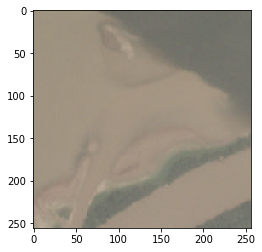

In [145]:
img = getRandomImagewith('haze')
plt.imshow(img);

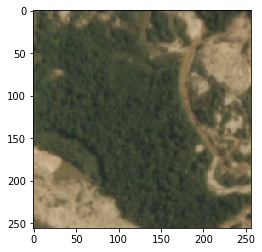

In [149]:
img = getRandomImagewith('artisinal_mine')
plt.imshow(img);

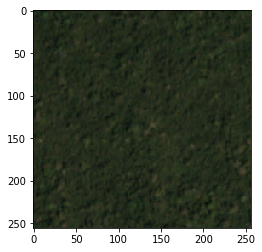

In [151]:
img = getRandomImagewith('blooming')
plt.imshow(img);

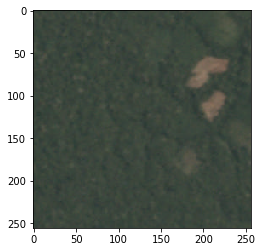

In [152]:
img = getRandomImagewith('selective_logging')
plt.imshow(img);

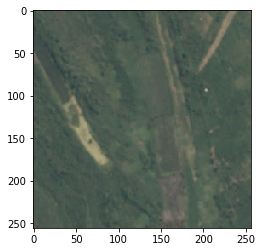

In [153]:
img = getRandomImagewith('slash_burn')
plt.imshow(img);

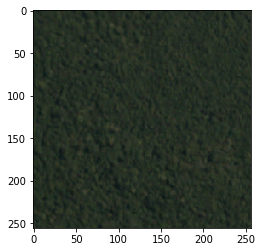

In [155]:
img = getRandomImagewith('primary')
plt.imshow(img);